On commence par importer les librairies nécessaires.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On crée ensuite un objet ABCGridWorld, qui implémentera les fonctions de transition et de récompense du MDP.

In [47]:
class ABCGridWorld:    
    def __init__(self):
        '''
        You can add any class attribute you wish here (maybe info regarding positions and rewards of A, B and C).
        '''            
        self.dim = 5
        self.action_space = {"up":(0, 1), "right":(1, 0), "down":(0, -1), "left":(-1, 0)}
        
        #Position des buts (cases récompenses positives) et de leur récompense associée
        self.pos_A, self.rew_A = (1,3), 10
        self.pos_B, self.rew_B = (2,1), 5
        self.pos_C, self.rew_C = (3,1), 4
        
        #reward out of grif (oob)
        
        self.rew_oob = -1
        
        
    def act(self, state, action):
        '''
        Takes a state-action pair and outputs the new state and the corresponding reward.
        '''
        assert action in self.action_space, f"Action {action} is not a known action"

        new_state = tuple([s_i+a_i for s_i, a_i in zip(state,self.action_space[action])])
        
        #S'assurer que l'agent reste sur la grille
        if new_state[0]<0 or new_state[0]>= self.dim or new_state[1]<0 or new_state[1]>=self.dim:
            new_state=state
            reward = self.rew_oob
        #Si on tombe sur un but, on a un reward associée au but, sinon, on a une reward de 0.
        else: 
            if new_state == self.pos_A:
                reward = self.rew_A
            elif new_state == self.pos_B:
                reward = self.rew_B
            elif new_state == self.pos_C:
                reward = self.rew_C
            else:
                reward=0

        return new_state, reward

In [48]:
#Création d'un objet GridWorld

grid = ABCGridWorld() # On se crée un objet GridWorld

Implémentez maintenant l'algorithme Policy Evaluation selon les spéfications fournies plus bas.

In [49]:
def policy_evaluation(grid, policy, theta, gamma):
    '''
    Performs the Policy Evaluation algorithm. The input policy is a N x N x A, 
    where N is the dimension of the grid world and A is the number of actions available.

    The function returns the value function table (N x N) for the input parameters.
    '''
    #Initialiser la fonction de valeur à 0 pour chacun des états
    
    V=np.zeros((grid.dim,grid.dim))
    
    #theta est une tolérance donnée en entrée
    delta=theta
    
    while delta>=theta:
        
        V_new=np.zeros_like(V)
        
        #les deux boucles externes servent à itérer sur les états
        #la boucle interne sert à itérer sur les actions pour faire la somme.
        for x in range(grid.dim):
            for y in range(grid.dim):
                for action_idx, action in enumerate(grid.action_space):
                    
                    next_state, reward = grid.act((x,y),action)
                    
                    prob=policy[x,y,action_idx]
                    
                    V_new[x,y]+= prob*(reward + gamma*V[next_state])
        
        delta=np.max(np.abs(V-V_new))
        
        V=V_new.copy()
    
    return V
        

Vous pouvez tester votre implémentation de Policy Evaluation à partir de la politique uniforme sur toutes les actions.

In [51]:
policy = np.ones((grid.dim, grid.dim, len(grid.action_space))) / len(grid.action_space) # Uniform random policy to test policy evaluation
print(policy)
policy_evaluation(grid,policy,0.001,0.99)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


array([[52.45349632, 54.64752924, 57.28073716, 60.38865126, 57.9823043 ],
       [54.40298354, 57.43042115, 60.13449013, 59.25593367, 59.94286365],
       [56.53721945, 57.8105826 , 58.90351975, 58.95589372, 55.9253627 ],
       [55.64600519, 56.67053207, 56.04653262, 54.02378988, 52.1510273 ],
       [52.9522694 , 54.4222062 , 52.81637604, 51.12847022, 49.62512746]])

Implémentez maintenant l'algorithme Policy Iteration. Assurez de briser arbitrairement les égalités possiblement retournées par l'opérateur argmax dans le pseudocode fourni dans le livre de Sutton et Barto.

In [65]:
def policy_iteration(grid, theta, gamma):
    '''
    Performs the Policy Iteration algorithm. The input policy is a N x N x A, where N is the dimension of the grid world and A is the number of actions available. You can call your previously implemented Policy Evaluation iteration routine.

    The function returns the optimal policy (N x N x A) for the passed gridworld.
    '''

    #Initialiser la fonction de valeur à 0 pour chacun des états
    V=np.zeros((grid.dim,grid.dim))
    
    #Initialiser une politique arbitraire (ici, uniforme)
    policy = np.ones((grid.dim, grid.dim, len(grid.action_space))) / len(grid.action_space) 

    #Flag pour voir si la politique a changée.
    policy_stable = False
    
    #On itère tant que la politique n'est pas stable.
    while not policy_stable:
        #On évalue notre politique, c'est-à-dire la valeur des différents états sous cette politique.
        V = policy_evaluation(grid,policy,theta,gamma)
        
        policy_stable = True
        
        for x in range(grid.dim):
            for y in range(grid.dim):
                olds_actions = np.argwhere(policy[x, y]>0)
                
                #Calcul de la valeur d'action pour chaque action
                
                q_vals=[]
                for action in grid.action_space:
                    s, r = grid.act((x,y),action)
                    q_vals.append(r+gamma*V[s])
                    
                q_vals=np.array(q_vals)
                  
                new_actions=np.argwhere(q_vals.max()-q_vals < theta)
                
                policy[x,y,:] = 0
                
                for new_action in new_actions:
                    #On choisit uniformément à travers les actions qui semblent optimales.
                    policy[x, y, new_action]= 1/len(new_actions)
        
                if not np.array_equal(olds_actions, new_actions):
                    policy_stable=False
                    
    return policy

Pour afficher les politiques

In [67]:
def plot_policy(policy, grid, arrow_len=0.35):
    x = np.linspace(0, grid.dim - 1, grid.dim) + 0.5
    y = np.linspace(0, grid.dim - 1, grid.dim) + 0.5
    zeros = np.zeros((grid.dim, grid.dim))

    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes()

    for i, action in enumerate(grid.action_space.values()):
        arrows = policy[:, :, i].T.copy()
        arrows[arrows > 0] = arrow_len
        
        U, V = arrows * action[0], arrows * action[1]
        plt.quiver(x, y, U, V, scale=1, units='xy')

    plt.xlim([0, grid.dim])
    plt.ylim([0, grid.dim])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()

Vous pouvez tester votre implémentation de Policy Iteration pour plusieurs valeurs de gamma.

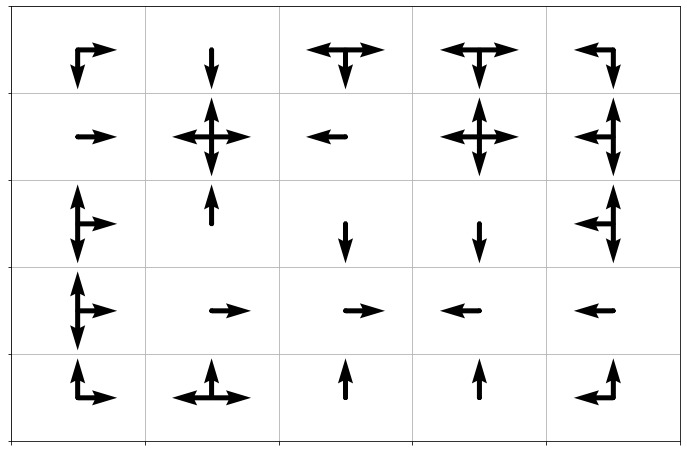

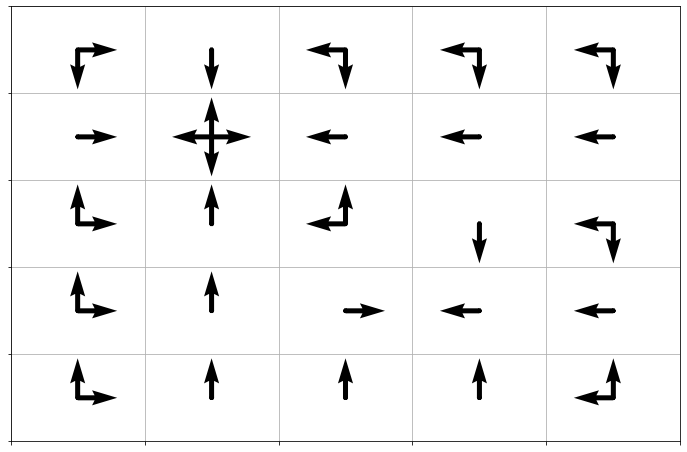

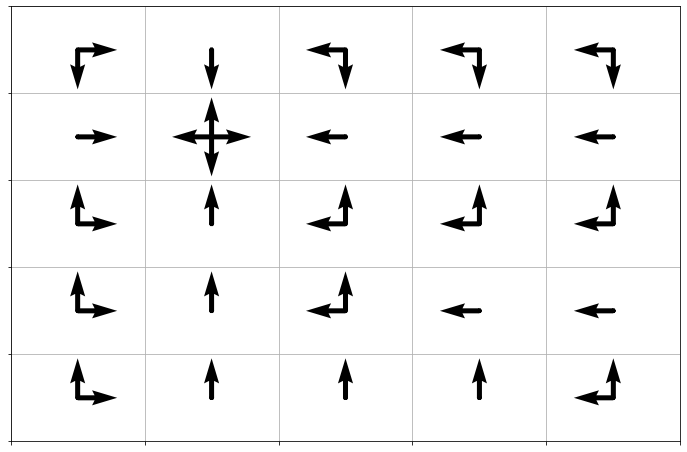

In [68]:
policy_0 = policy_iteration(grid, theta=0.01, gamma=0.0)
policy_0_9 = policy_iteration(grid, theta=0.01, gamma=0.9)
policy_0_99 = policy_iteration(grid, theta=0.01, gamma=0.99)

plot_policy(policy_0, grid)
plot_policy(policy_0_9, grid)
plot_policy(policy_0_99, grid)
#print(policy_0)
#print(policy_0_9)
#print(policy_0_99)

Que remarquez-vous ? Est-ce que les politiques optimales sont les mêmes pour toutes les valeurs de gamma ? Pourquoi ?

Implémentez mainteant l'algorithme Value Iteration. Portez encore une fois une attention particulière à briser arbitrairement les cas où l'opérateur argmax retournerait plus d'un élément.

In [82]:
def value_iteration(grid, theta, gamma):
    '''
    Performs the Value Iteration algorithm. The input policy is a N x N x A, 
    where N is the dimension of the grid world and A is the number of actions available. 
    
    The function returns the optimal policy (N x N x A) for the passed gridworld.
    '''
    
    #Initialiser la fonction de valeur à 0 pour chacun des états
    V=np.zeros((grid.dim,grid.dim))
    
    #theta est une tolérance donnée en entrée
    delta=theta
    
    while delta>=theta:
        
        delta=0
        
        for x in range(grid.dim):
            for y in range(grid.dim):
            
                old_V = V[x,y]
                
                q_vals=[]
                for action in grid.action_space:
                    s, r = grid.act((x,y),action)
                    q_vals.append(r+gamma*V[s])
                
                V[x,y] = max(q_vals)
                
                delta = max(delta, np.abs(old_V - V[x,y]))
    
    policy = np.zeros((grid.dim, grid.dim, len(grid.action_space)))
    
    for x in range(grid.dim):
            for y in range(grid.dim):
                
                q_vals=[]
                for action in grid.action_space:
                    s, r = grid.act((x,y),action)
                    q_vals.append(r+gamma*V[s])
                    
                q_vals=np.array(q_vals)
                
                new_actions=np.argwhere(q_vals.max()-q_vals < theta)
                
                policy[x,y,:] = 0
                
                for new_action in new_actions:
                    #On choisit uniformément à travers les actions qui semblent optimales.
                    policy[x, y, new_action]= 1/len(new_actions)
    
    return policy
    

Vous pouvez tester votre implémentation à nouveau sur différentes valeurs de gamma. Vous pouvez valider que la politique retournée est optimale en vous assurant qu'elle est la même que celle retournée par Policy Iteration.

In [84]:
v_policy_0_99 = value_iteration(grid, 0.01, 0.99)
v_policy_0_9 = value_iteration(grid, 0.01, 0.9)
v_policy_0 = value_iteration(grid, 0.01, 0.0)

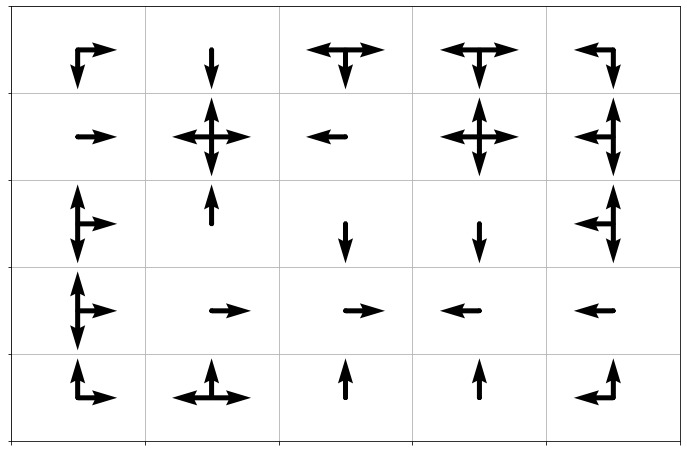

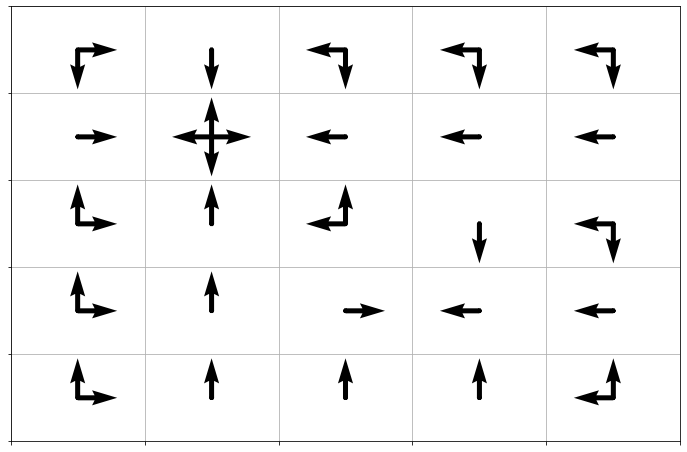

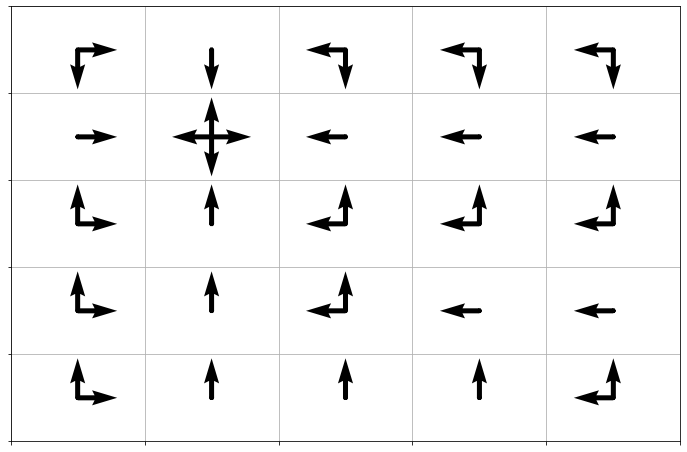

In [85]:
plot_policy(v_policy_0, grid)
plot_policy(v_policy_0_9, grid)
plot_policy(v_policy_0_99, grid)

Nous vous fournissons aussi une fonction utilitaire pour visualiser une politique sur le GridWorld ABC.

In [ ]:
def plot_policy(policy, grid, arrow_len=0.35):
    x = np.linspace(0, grid.dim - 1, grid.dim) + 0.5
    y = np.linspace(0, grid.dim - 1, grid.dim) + 0.5
    zeros = np.zeros((grid.dim, grid.dim))

    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes()

    for i, action in enumerate(grid.action_space.values()):
        arrows = policy[:, :, i].T.copy()
        arrows[arrows > 0] = arrow_len
        
        U, V = arrows * action[0], arrows * action[1]
        plt.quiver(x, y, U, V, scale=1, units='xy')

    plt.xlim([0, grid.dim])
    plt.ylim([0, grid.dim])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()

Voici comment on appelle plot_policy() pour faire afficher la politique.

In [ ]:
plot_policy(policy_0, grid)
plot_policy(policy_0_9, grid)
plot_policy(policy_0_99, grid)

In [13]:
cars = ['kia', 'audi', 'bmw']
for car in enumerate(cars):
  print(car)

(0, 'kia')
(1, 'audi')
(2, 'bmw')
